In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas as pd
import os

In [2]:
df_spy_30min = pd.read_csv(f'SPY_30min_sample.txt', sep=',', header=None)
df_spy_30min.columns = ['Date Time', 'open', 'high', 'low', 'close', 'volume']

last_high_list = []

close_prices = df_spy_30min[['Date Time','close']]
len_of_close_prices = len(close_prices)
turn_point_prices = []
if len_of_close_prices > 1:
    revserse_direction_is_up = (close_prices.loc[len_of_close_prices-2,'close'] > close_prices.loc[len_of_close_prices-1, 'close'])

last_turn_price = (close_prices.loc[len_of_close_prices-1, 'Date Time'], close_prices.loc[len_of_close_prices-1, 'close'])
for i in range(len_of_close_prices - 2, -1, -1):
    if close_prices.loc[i, 'close'] == last_turn_price[1]:
        last_turn_price = (close_prices.loc[i, 'Date Time'], close_prices.loc[i, 'close'])
        continue

    if close_prices.loc[i, 'close'] > last_turn_price[1]:
        if revserse_direction_is_up == False:
            turn_point_prices.insert(0,(close_prices.loc[i, 'Date Time'], close_prices.loc[i, 'close']))
            revserse_direction_is_up = True
    else:
        if revserse_direction_is_up == True:
            turn_point_prices.insert(0,(close_prices.loc[i, 'Date Time'], close_prices.loc[i, 'close']))
            revserse_direction_is_up = False
    
    last_turn_price = (close_prices.loc[i, 'Date Time'], close_prices.loc[i, 'close'])


print(turn_point_prices)

[('2022-04-01 04:00:00', 453.9), ('2022-04-01 04:30:00', 454.01), ('2022-04-01 05:30:00', 454.35), ('2022-04-01 06:30:00', 454.31), ('2022-04-01 07:30:00', 454.12), ('2022-04-01 08:00:00', 454.23), ('2022-04-01 08:30:00', 453.24), ('2022-04-01 09:30:00', 452.26), ('2022-04-01 10:00:00', 451.1), ('2022-04-01 11:00:00', 451.695), ('2022-04-01 11:30:00', 450.35), ('2022-04-01 12:30:00', 449.931), ('2022-04-01 13:30:00', 450.53), ('2022-04-01 14:30:00', 451.7966), ('2022-04-01 15:00:00', 451.0799), ('2022-04-01 15:30:00', 452.88), ('2022-04-01 17:00:00', 452.93), ('2022-04-01 18:00:00', 453.11), ('2022-04-01 19:00:00', 453.05), ('2022-04-01 19:30:00', 453.29), ('2022-04-04 05:00:00', 453.51), ('2022-04-04 06:00:00', 453.71), ('2022-04-04 07:00:00', 453.62), ('2022-04-04 08:00:00', 453.68), ('2022-04-04 09:30:00', 454.52), ('2022-04-04 10:00:00', 454.84), ('2022-04-04 11:30:00', 455.51), ('2022-04-04 12:00:00', 455.5654), ('2022-04-04 15:00:00', 456.1), ('2022-04-04 16:00:00', 456.73), ('20

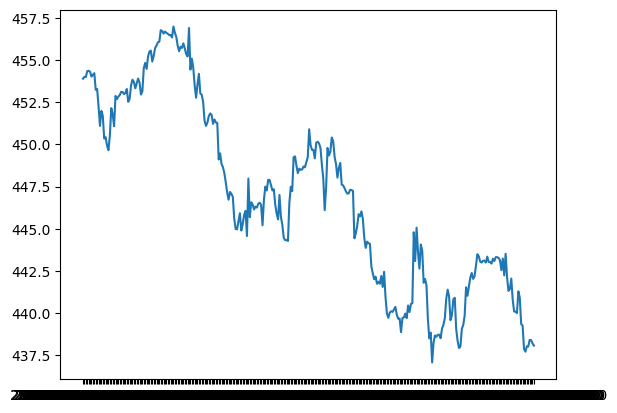

In [3]:
plt.plot(close_prices['Date Time'], close_prices['close'])

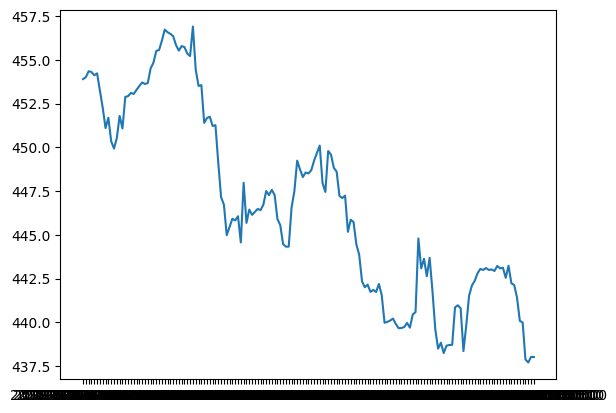

In [4]:
plt.plot([row[0] for row in turn_point_prices], [row[1] for row in turn_point_prices])